In [3]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import zipfile
import scipy.stats as stats


%pylab inline

datestring = '201502'
!curl -O "https://s3.amazonaws.com/tripdata/{datestring}-citibike-tripdata.zip"

zf = zipfile.ZipFile(datestring+'-citibike-tripdata.zip')
df = pd.read_csv(zf.open(datestring+'-citibike-tripdata.csv'))

df['date'] = pd.to_datetime(df['starttime'])
df.head()

Populating the interactive namespace from numpy and matplotlib
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4708k  100 4708k    0     0  11.2M      0 --:--:-- --:--:-- --:--:-- 19.2M


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978.0,2,2015-02-01 00:00:00
1,379,2/1/2015 0:00,2/1/2015 0:07,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,-73.981656,21289,Subscriber,1993.0,1,2015-02-01 00:00:00
2,2474,2/1/2015 0:01,2/1/2015 0:42,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,-74.006744,18903,Subscriber,1969.0,2,2015-02-01 00:01:00
3,818,2/1/2015 0:01,2/1/2015 0:15,2004,6 Ave & Broome St,40.724399,-74.004704,505,6 Ave & W 33 St,40.749013,-73.988484,21044,Subscriber,1985.0,2,2015-02-01 00:01:00
4,544,2/1/2015 0:01,2/1/2015 0:10,323,Lawrence St & Willoughby St,40.692362,-73.986317,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19868,Subscriber,1957.0,1,2015-02-01 00:01:00


In [3]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'date'],
      dtype='object')

In [4]:
df.drop(['tripduration', 'starttime', 'stoptime', 'start station id', 'start station name', 'start station latitude', 
         'start station longitude', 'end station id', 'end station name','end station latitude', 'end station longitude', 
         'bikeid', 'birth year', 'gender'], axis=1, inplace=True)

In [9]:
df.head()

,usertype,date
0,Subscriber,2015-02-01 00:00:00
1,Subscriber,2015-02-01 00:00:00
2,Subscriber,2015-02-01 00:01:00
3,Subscriber,2015-02-01 00:01:00
4,Subscriber,2015-02-01 00:01:00


In [5]:
#Replace Method: 
df['usertype'] = df['usertype'].replace(['Subscriber', 'Customer'], [1, 2])

In [6]:
df.head(79)

,usertype,date
0,1,2015-02-01 00:00:00
1,1,2015-02-01 00:00:00
2,1,2015-02-01 00:01:00
3,1,2015-02-01 00:01:00
4,1,2015-02-01 00:01:00
5,1,2015-02-01 00:02:00
6,1,2015-02-01 00:04:00
7,1,2015-02-01 00:04:00
8,1,2015-02-01 00:04:00
9,1,2015-02-01 00:05:00


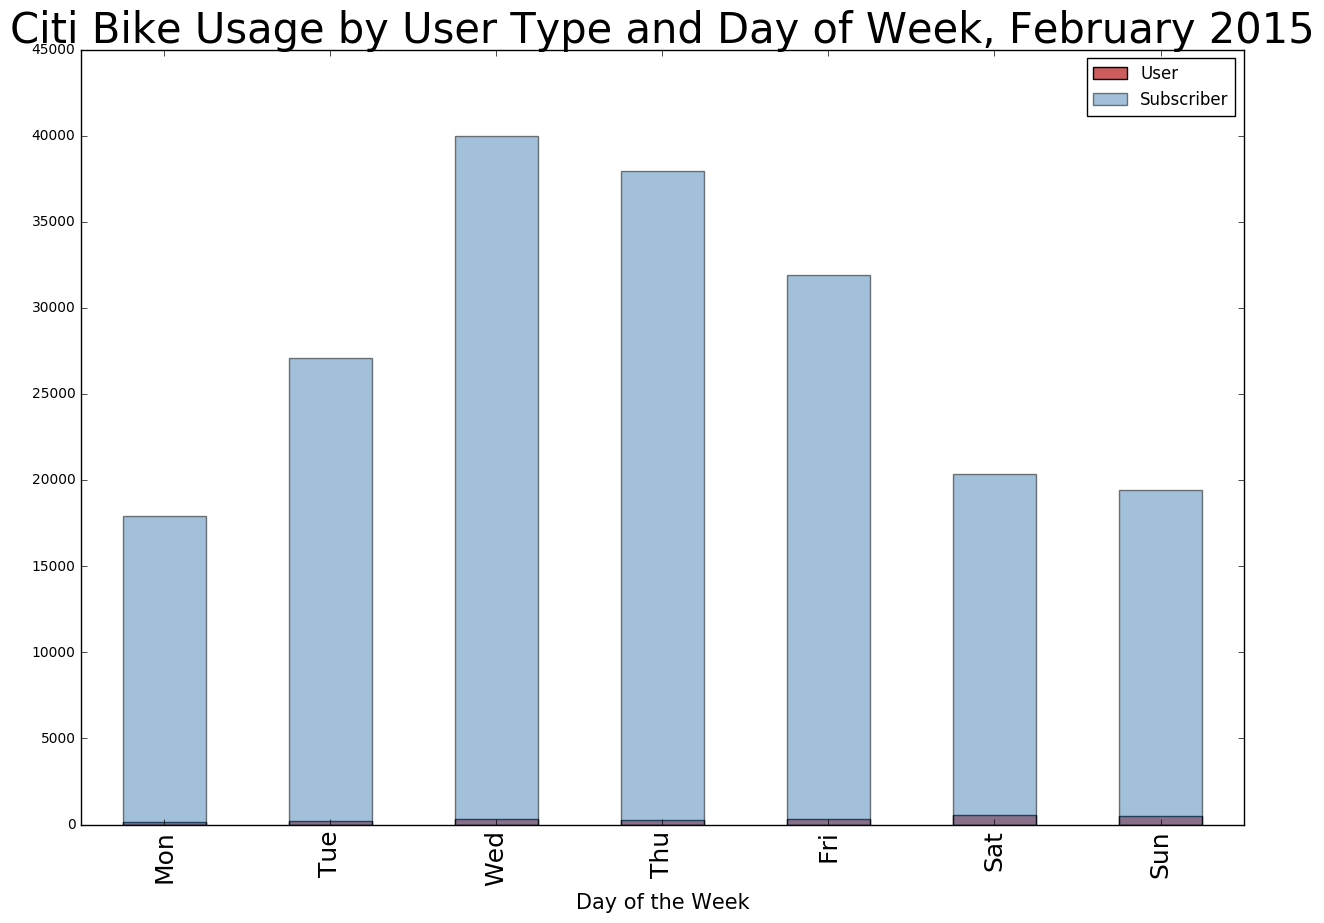

In [12]:
fig = pl.figure(figsize(15,10))

norm_u = 1
((df['date'][df['usertype'] == 2].groupby([df['date'].dt.weekday]).count()) / norm_u).plot(kind="bar", 
                                                                                         color='IndianRed', 
                                                                                         label='User')
norm_s = 1
ax = ((df['date'][df['usertype'] == 1].groupby([df['date'].dt.weekday]).count()) / norm_s).plot(kind="bar", 
                                                                                              color='SteelBlue', 
                                                                                              alpha=0.5,
                                                                                              label='Subscriber')
tmp = ax.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=18)
ax.set_ylim([0,45000])
pl.xlabel('Day of the Week', fontsize=15)
pl.title ('Citi Bike Usage by User Type and Day of Week, February 2015', fontsize =30)
pl.legend()

mymean


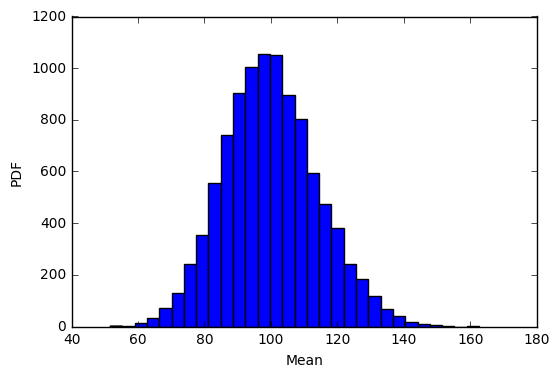

In [11]:

distributions = ['usertype']
mymean = 100
print("mymean")

df = mymean
md = {}
md['usertype'] = np.random.chisquare(df, size = 1000)
pl.hist(md['usertype'], bins = 30)
pl.ylabel('PDF')
pl.xlabel('Mean')




In [7]:
print("usertype mean: %.2f, standard deviation: %2f" %(md['usertype'].mean(), md['usertype'].std()))

usertype mean: 100.12, standard deviation: 14.177239


In [14]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20] (99,)


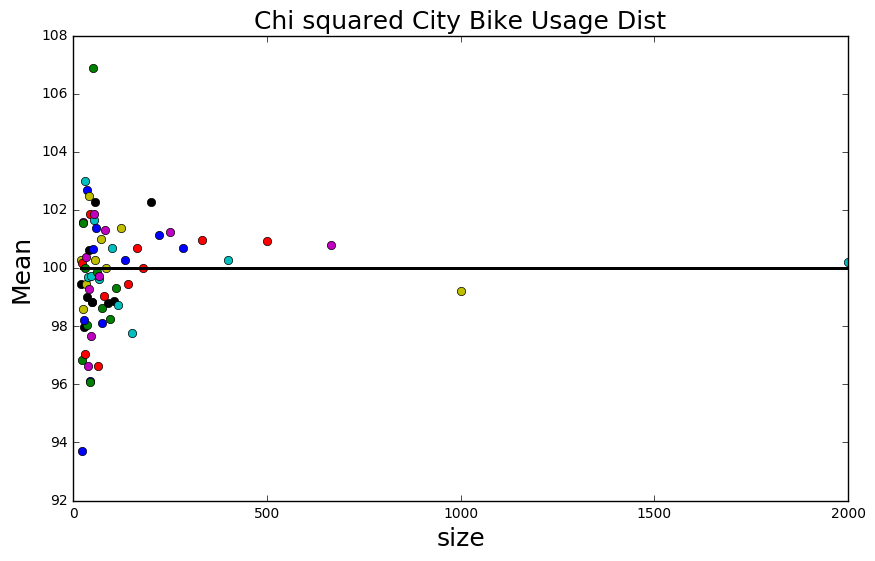

In [19]:
md['usertype'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['usertype'][n] = np.random.chisquare(df, size = n)
    
# save the means for plotting later    

md['usertype']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['usertype']:
    if not type(nn) == str:
        md['usertype']['means'][nn] = md['usertype'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['usertype']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('size', fontsize=18)
        axchisq_mu_n.set_ylabel('Mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared City Bike Usage Dist', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

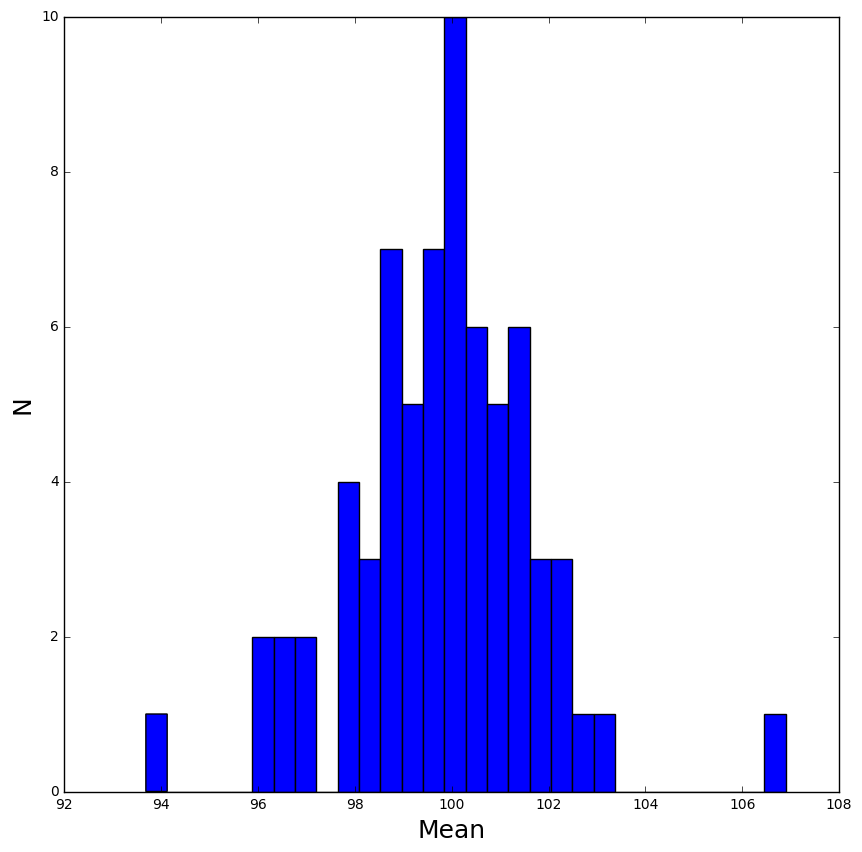

In [21]:
allmeans = list(md['usertype']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('Mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)